# YOLO v3 TF2 GPU Colab
- You only look once!!!

### 1. Clone and install dependencies
- 설치가 끝나면 '런타임 다시시작'하여야 함

In [1]:
# 설치되어있는 tensorflow, keras 삭제
!pip uninstall -y tensorflow keras

Found existing installation: tensorflow 2.8.0+zzzcolab20220506162203
Uninstalling tensorflow-2.8.0+zzzcolab20220506162203:
  Successfully uninstalled tensorflow-2.8.0+zzzcolab20220506162203
Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0


In [2]:
!git clone https://github.com/zzh8829/yolov3-tf2

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 439, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 439 (delta 2), reused 0 (delta 0), pack-reused 433
Receiving objects: 100% (439/439), 4.24 MiB | 4.45 MiB/s, done.
Resolving deltas: 100% (250/250), done.


In [3]:
# yolov3-tf2로 이동
%cd yolov3-tf2

/content/yolov3-tf2


In [4]:
!pip install -r requirements-gpu.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/yolov3-tf2 (from -r requirements-gpu.txt (line 6))
     |████████████████████████████████| 454.4 MB 9.7 kB/s 
     |████████████████████████████████| 28.2 MB 1.2 MB/s 
     |████████████████████████████████| 462 kB 64.3 MB/s 
     |████████████████████████████████| 14.8 MB 51.3 MB/s 
     |████████████████████████████████| 132 kB 77.3 MB/s 
     |████████████████████████████████| 4.0 MB 37.8 MB/s 
     |████████████████████████████████| 1.2 MB 51.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68720 sha256=63ea094222a21ba0f77ddb9abd907557301ce10bee9108d20aceaff8f8c1d7e6
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-e

In [1]:
!pip install tensorflow==2.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.5 MB 31 kB/s 
     |████████████████████████████████| 3.8 MB 54.6 MB/s 
     |████████████████████████████████| 462 kB 58.2 MB/s 
     |████████████████████████████████| 2.9 MB 56.5 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's depen

In [2]:
!pip install keras==2.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 14.4 MB/s 


In [ ]:
# 런타임 다시시작

### 2. Tensorflow2 version 확인

In [1]:
%cd yolov3-tf2/
!ls

/content/yolov3-tf2
checkpoints	 data		  README.md		train.py
colab_gpu.ipynb  detect.py	  requirements-gpu.txt	yolov3_tf2
conda-cpu.yml	 detect_video.py  requirements.txt	yolov3_tf2.egg-info
conda-gpu.yml	 docs		  setup.py
convert.py	 LICENSE	  tools


In [2]:
import tensorflow as tf
tf.__version__

'2.4.2'

### 3. Darknet의 pretrained weight을 변환

In [3]:
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights

--2022-05-27 07:11:38--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘data/yolov3.weights’

data/yolov3.weights 100%[===================>] 236.52M  18.5MB/s    in 16s     

2022-05-27 07:11:55 (14.9 MB/s) - ‘data/yolov3.weights’ saved [248007048/248007048]



In [4]:
!python convert.py --weights ./data/yolov3.weights --output ./checkpoints/yolov3.tf

2022-05-27 07:12:17.087102: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-05-27 07:12:18.572409: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-27 07:12:18.573982: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-27 07:12:18.643649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 07:12:18.644237: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-05-27 07:12:18.644282: I tensorflow/stream_executor/platform/default/dso_loade

### 4. Initialize detector

In [5]:
import sys
from absl import app, logging, flags
from absl.flags import FLAGS
import time
import cv2
import numpy as np
import tensorflow as tf
from yolov3_tf2.models import YoloV3, YoloV3Tiny
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [6]:
!ls -l checkpoints

total 242288
-rw-r--r-- 1 root root        75 May 27 07:12 checkpoint
-rw-r--r-- 1 root root 248070167 May 27 07:12 yolov3.tf.data-00000-of-00001
-rw-r--r-- 1 root root     24143 May 27 07:12 yolov3.tf.index


In [7]:
flags.DEFINE_string('classes', './data/coco.names', 'path to classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf', 'path to weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'path to input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord instead of image')
flags.DEFINE_string('output', './output.jpg', 'path to output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes in the model')

app._run_init(['yolov3'], app.parse_flags_with_usage)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### 5. Detect Image

In [8]:
yolo = YoloV3(classes=FLAGS.num_classes)
yolo.load_weights(FLAGS.weights).expect_partial()
class_names = [c.strip() for c in open(FLAGS.classes).readlines()]
print(class_names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
len(class_names)

80

In [10]:
def detector():
    img_raw = tf.image.decode_image(open(FLAGS.image,'rb').read(), channels=3)
    img = tf.expand_dims(img_raw, 0)
    img = transform_images(img, FLAGS.size)

    t1 = time.time()
    boxes, scores, classes, nums = yolo(img)
    t2 = time.time()
    print(f'time: {t2 - t1}')

    for i in range(nums[0]):
        print(f'detections: {class_names[int(classes[0][i])]}, {np.array(scores[0][i])}, {np.array(boxes[0][i])}')

    img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
    img = draw_outputs(img, (boxes, scores, classes, nums), class_names)

    return img

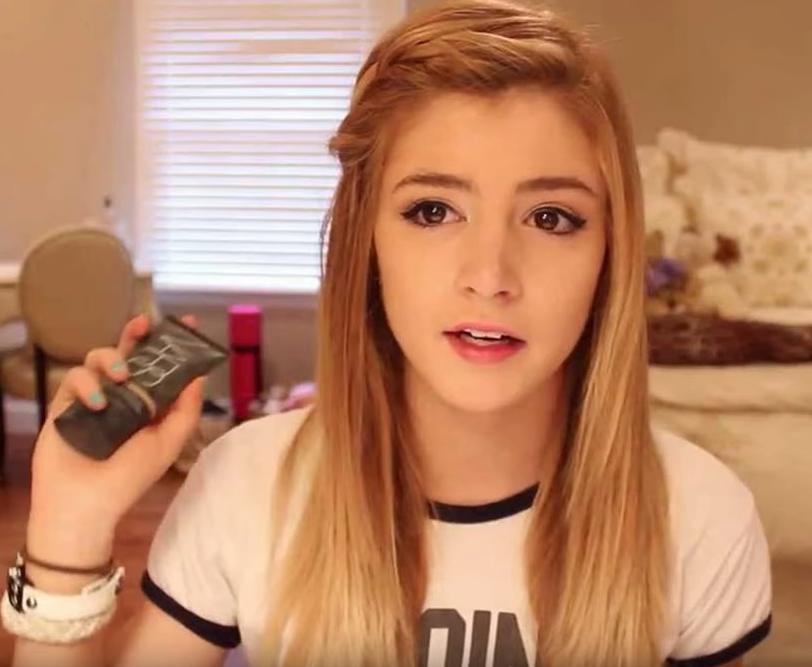

In [11]:
FLAGS.image = 'data/girl.png'
Image(filename=FLAGS.image, width=500)

time: 4.876116752624512
detections: person, 0.9997697472572327, [0.06754473 0.03718698 0.967988   0.9650754 ]
detections: chair, 0.9255483150482178, [0.01851872 0.34200278 0.17385136 0.6278329 ]


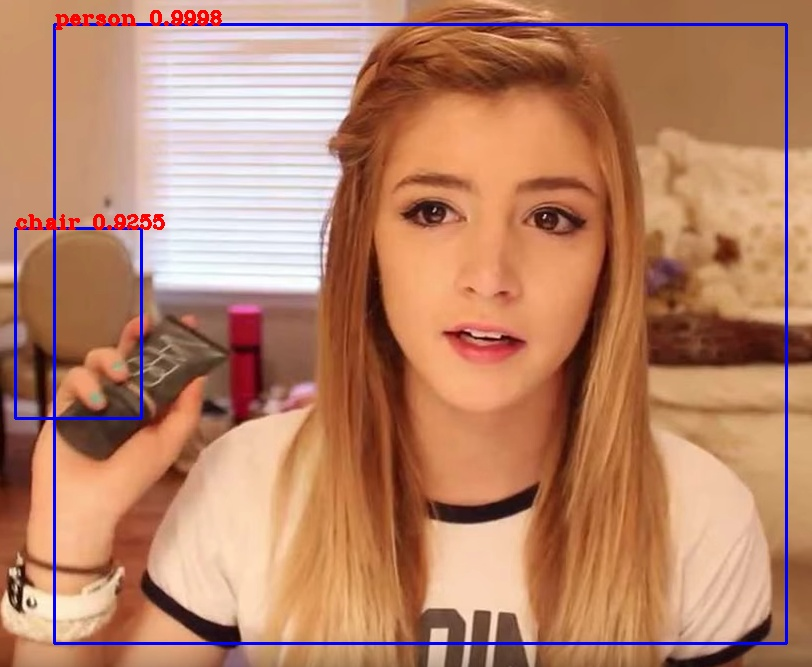

In [12]:
output = detector()
display(Image(data=bytes(cv2.imencode('.jpg', output)[1]), width=500))

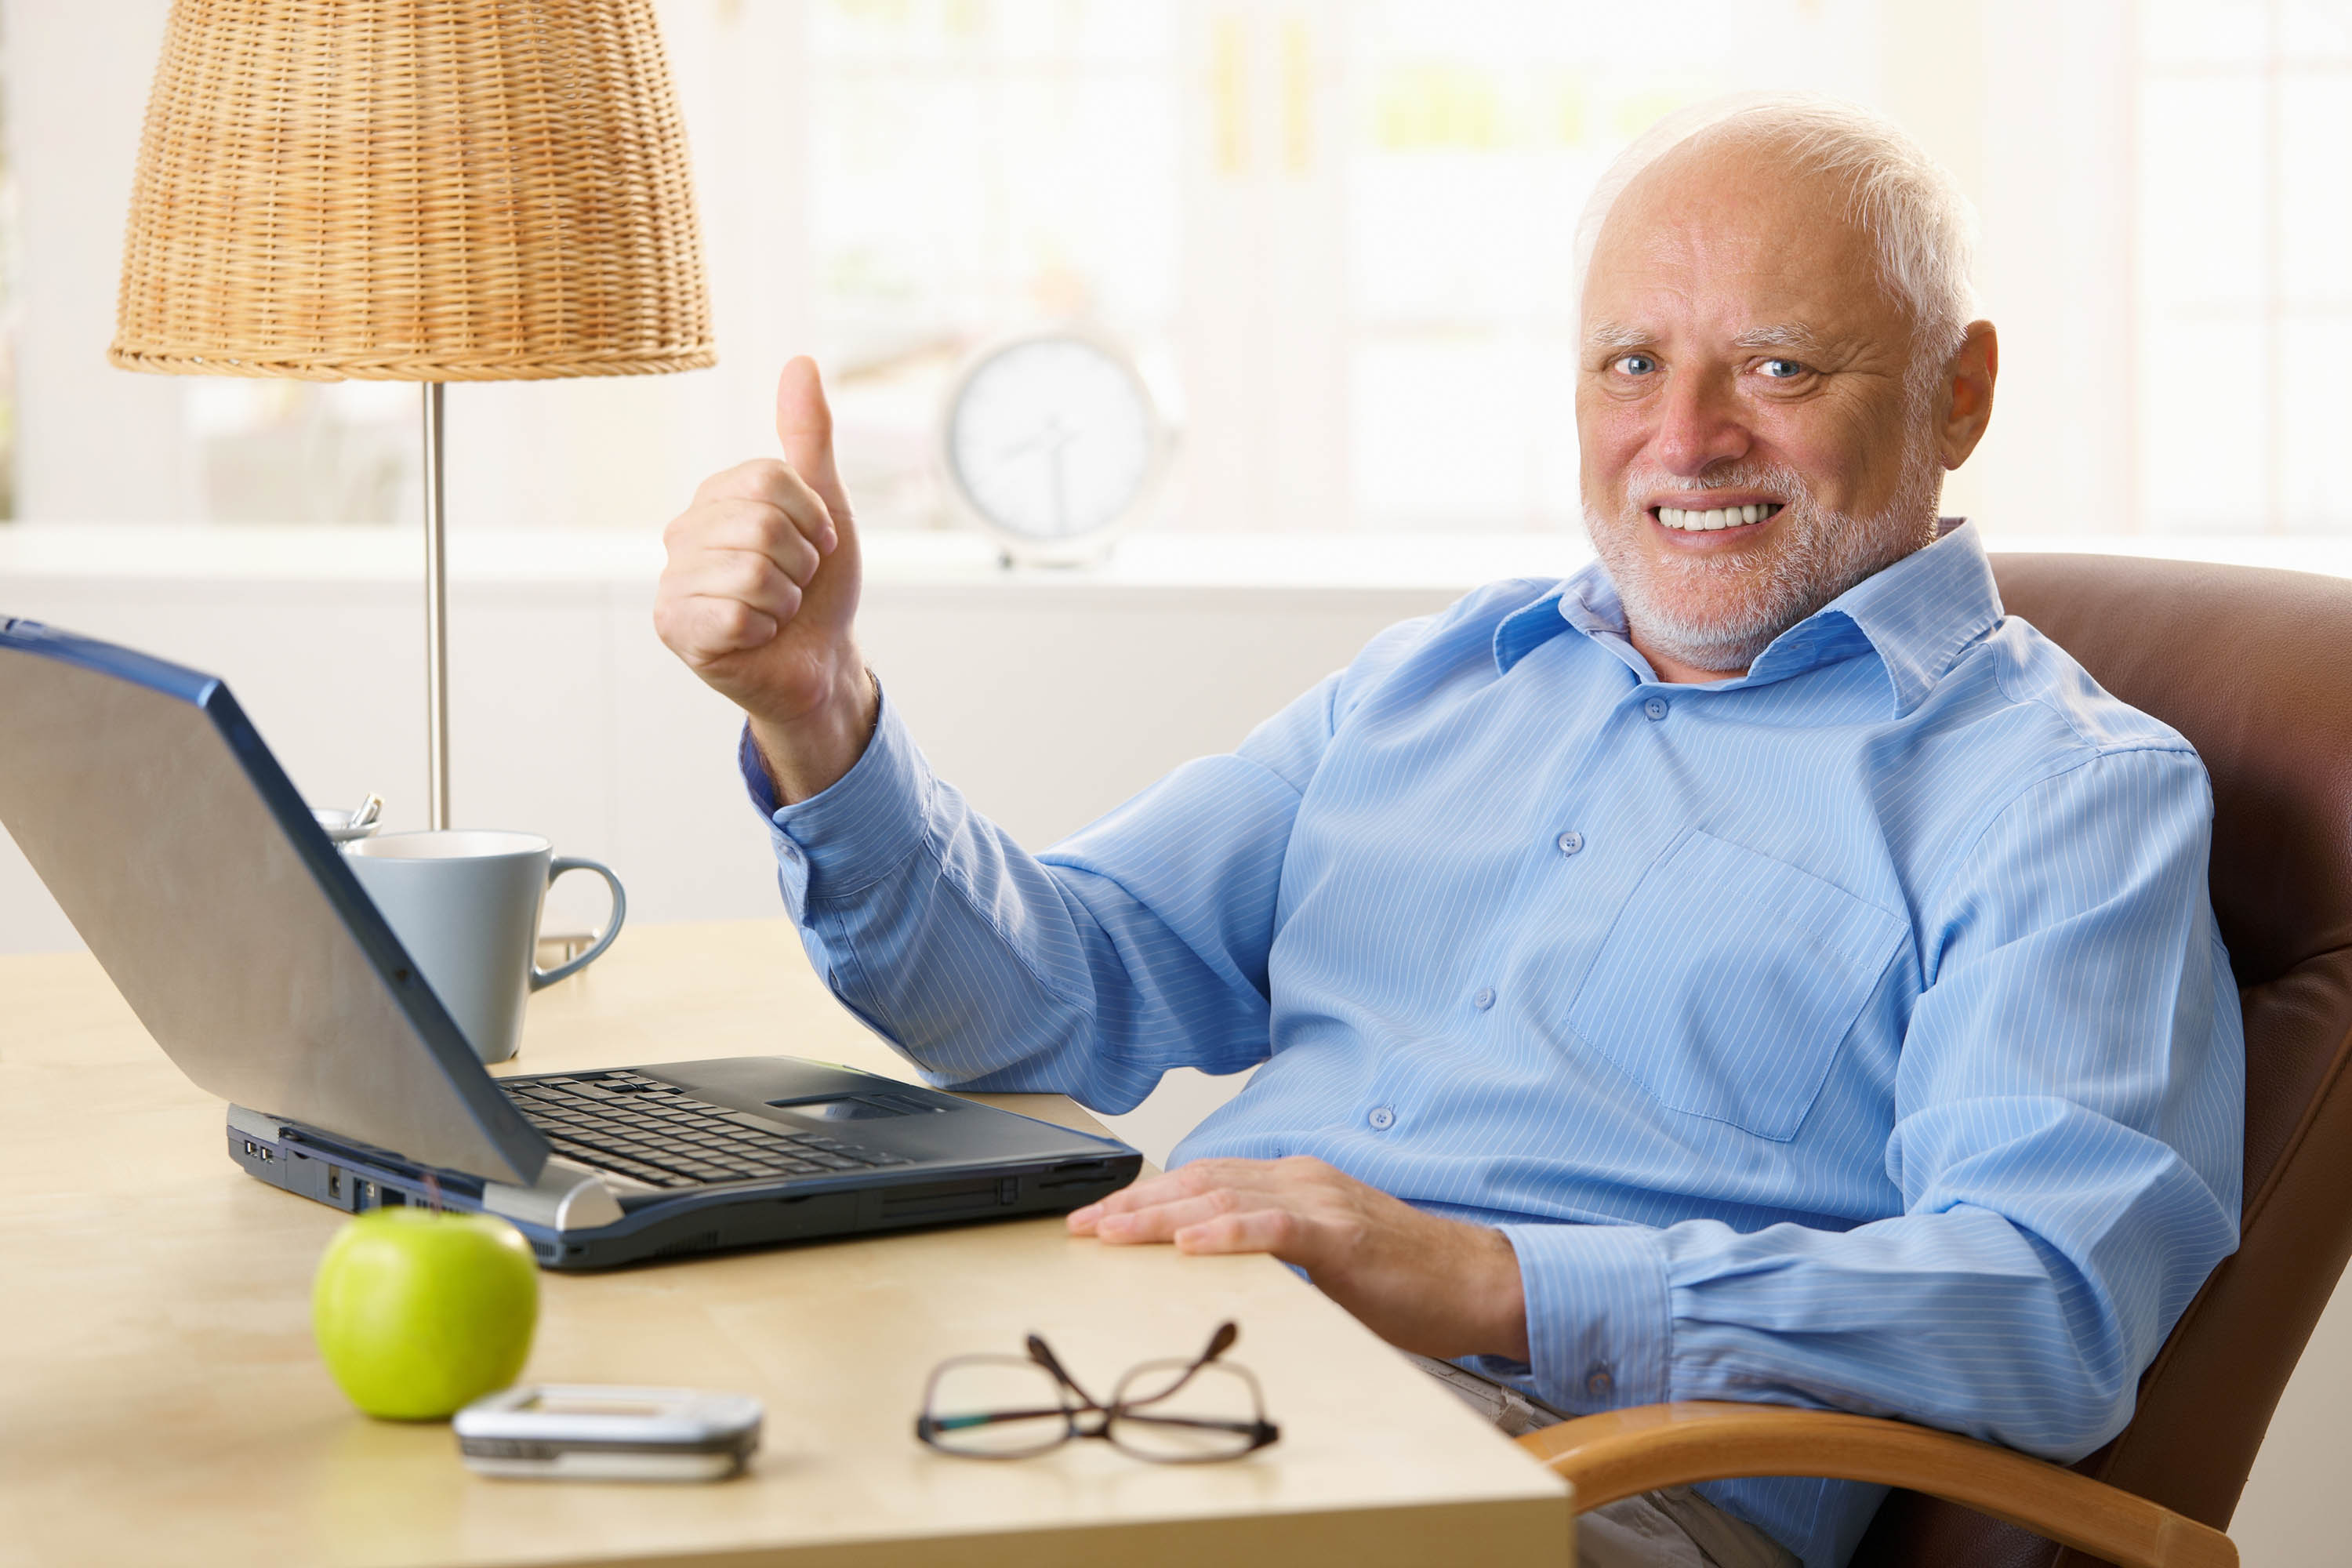

In [13]:
FLAGS.image = 'data/meme.jpg'
Image(filename=FLAGS.image, width=800)

time: 0.08975887298583984
detections: cup, 0.9980731010437012, [0.1426622  0.52777606 0.2718425  0.65748256]
detections: person, 0.9976975321769714, [0.2898292 0.0985465 0.9584648 0.9202168]
detections: laptop, 0.9599870443344116, [-0.01710656  0.39493692  0.5229728   0.7962775 ]
detections: apple, 0.9081627726554871, [0.13114463 0.77143586 0.22893356 0.90729535]
detections: cell phone, 0.7321376800537109, [0.18850097 0.87569416 0.3350185  0.9422209 ]
detections: clock, 0.670001208782196, [0.4010809  0.2124461  0.49267417 0.35021502]


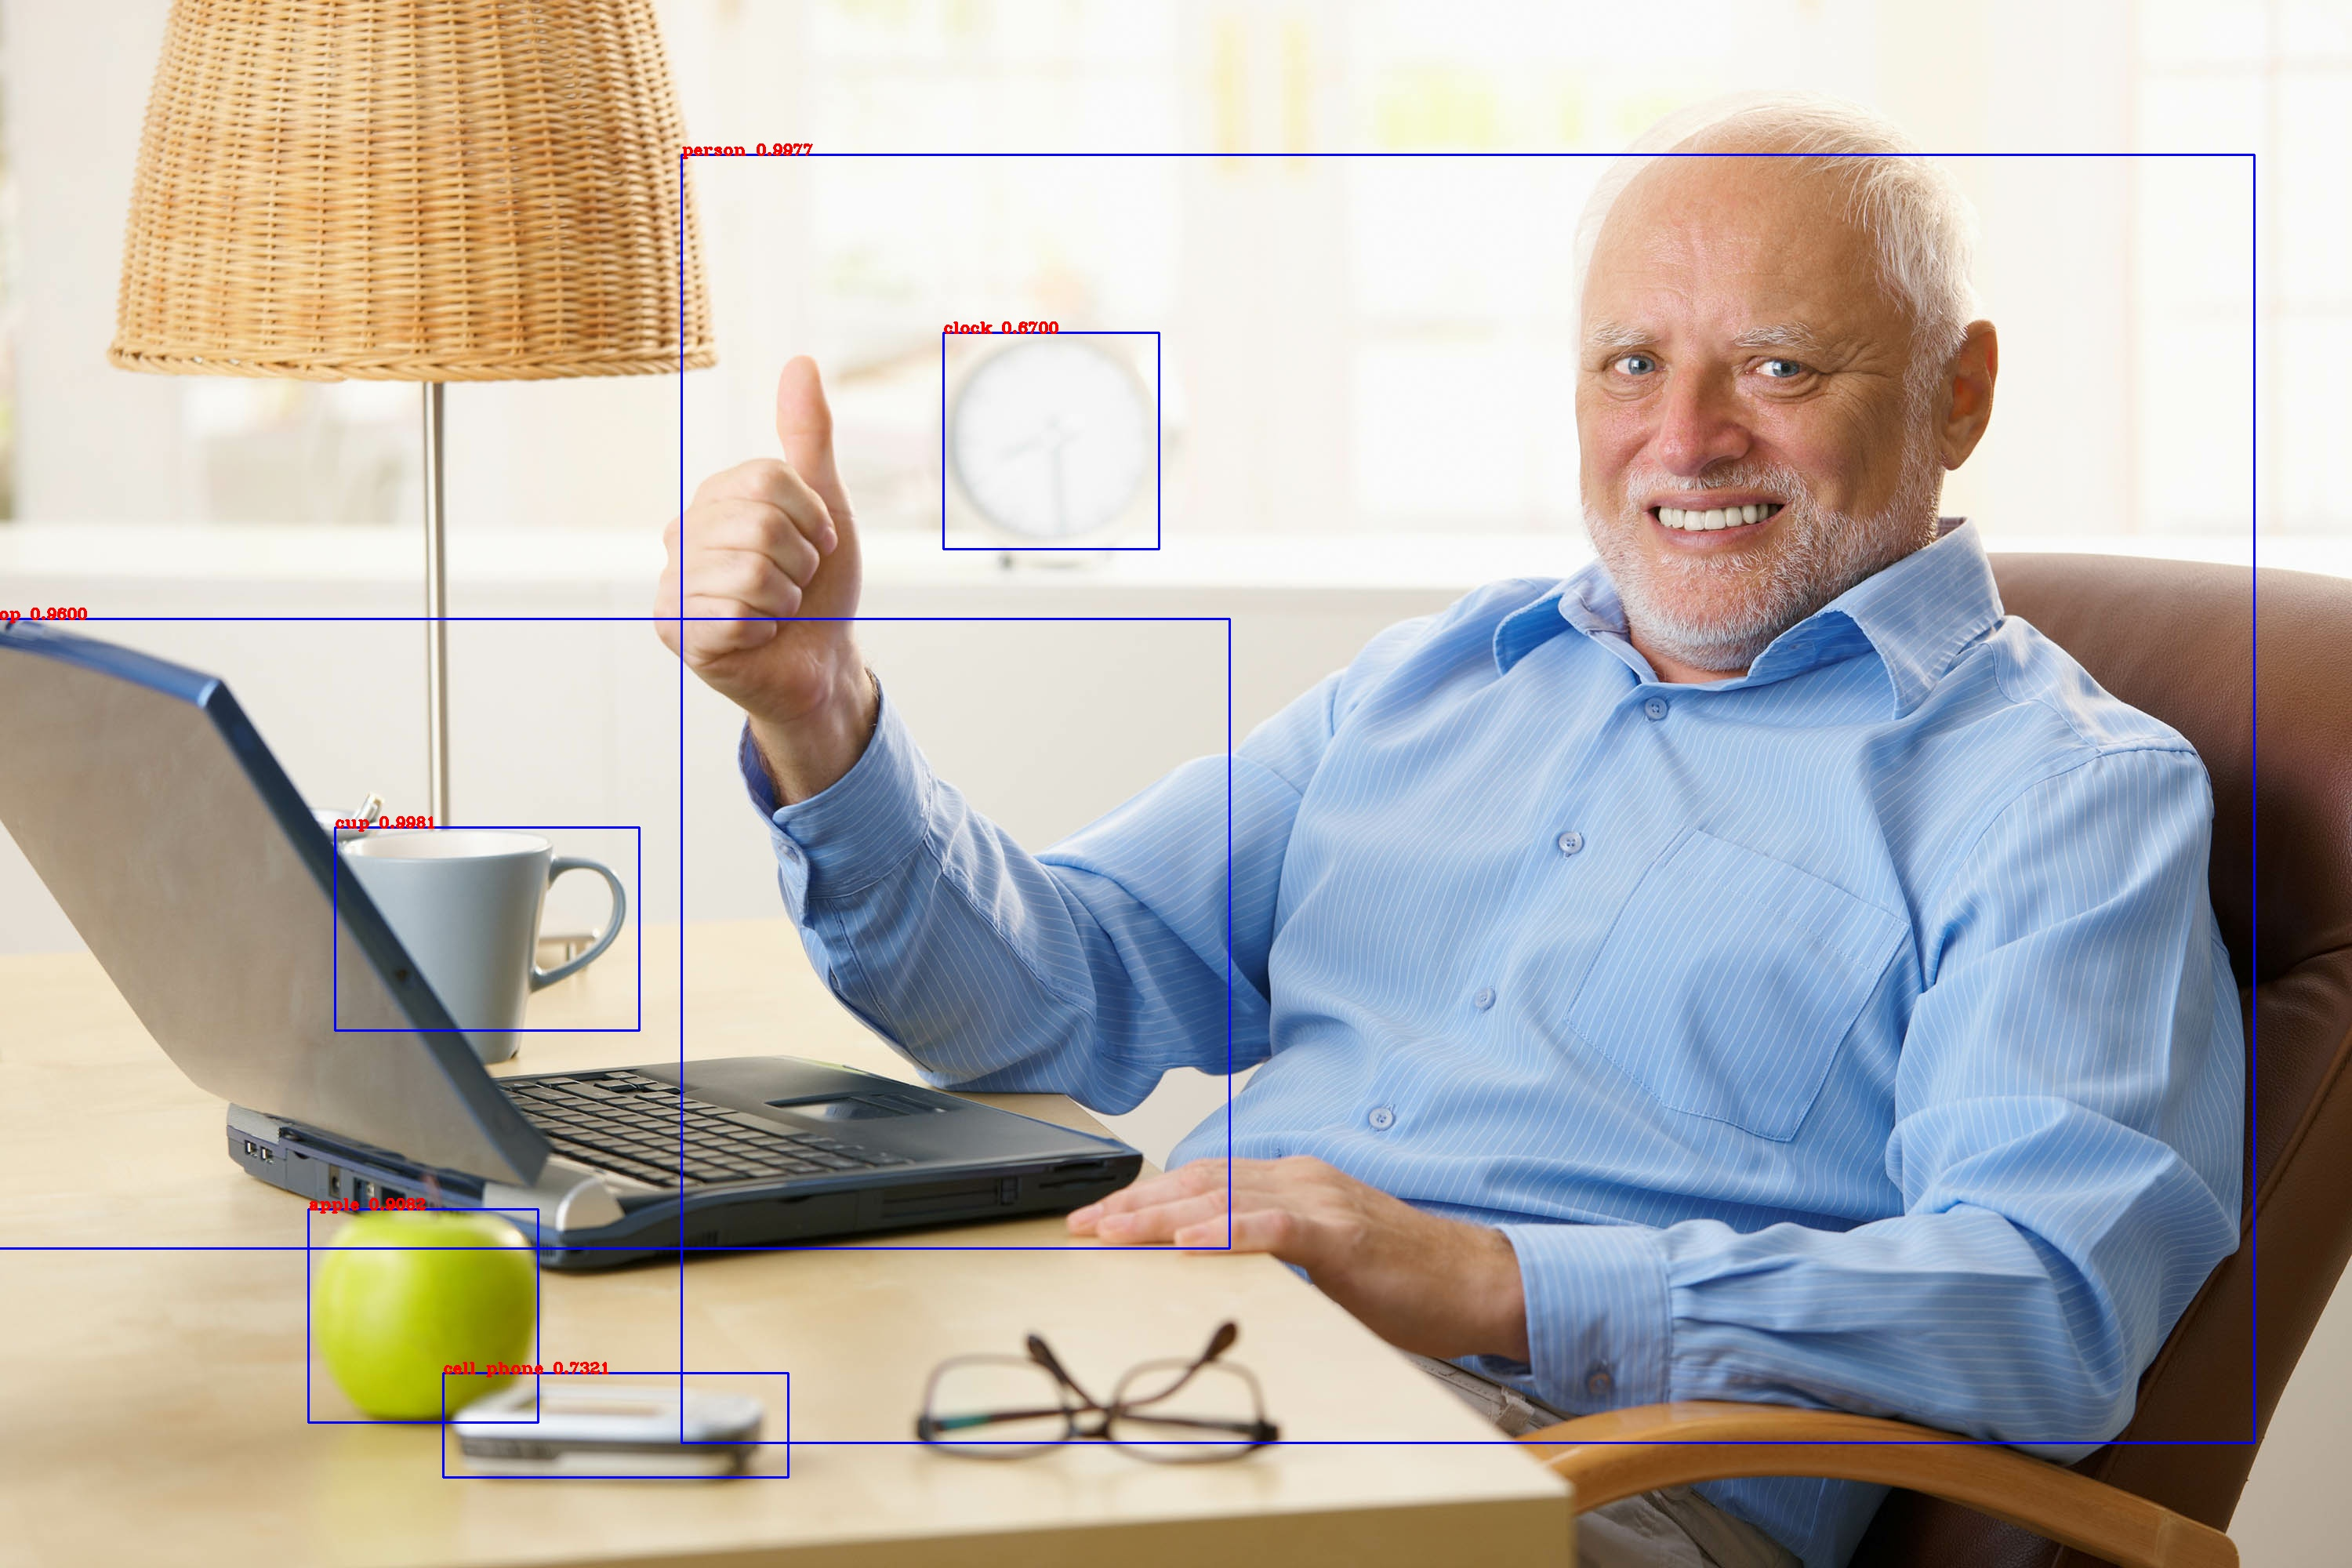

In [14]:
output = detector()
display(Image(data=bytes(cv2.imencode('.jpg', output)[1]), width=800))

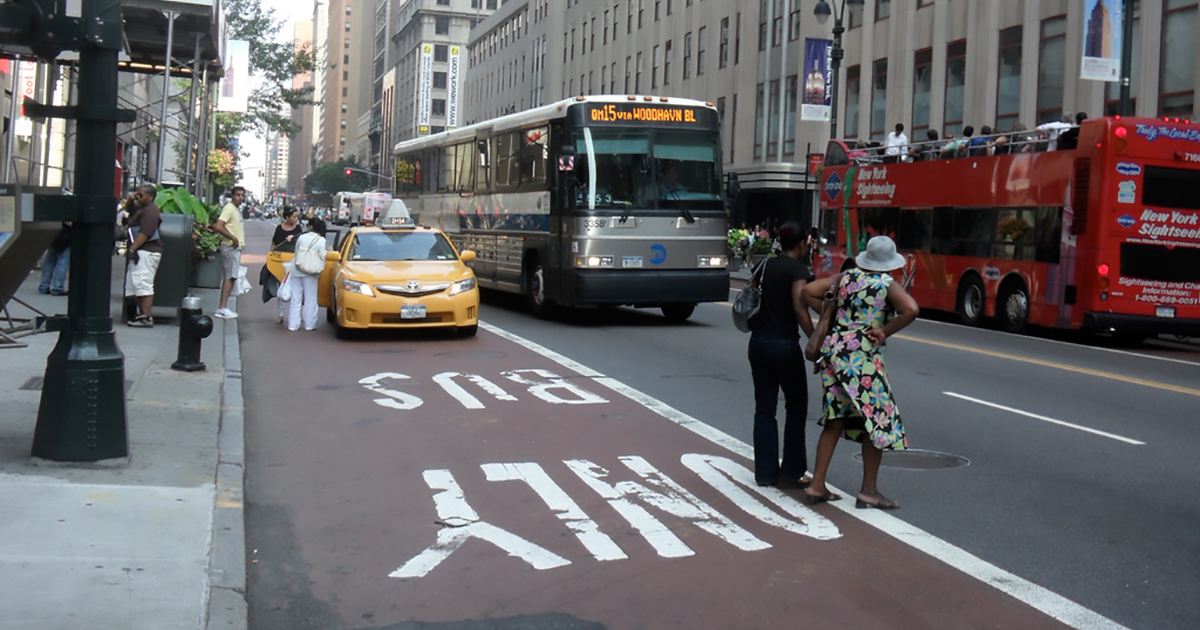

In [15]:
FLAGS.image = 'data/street.jpg'
Image(filename=FLAGS.image, width=1000)

time: 0.09090876579284668
detections: car, 0.9966800212860107, [0.26270664 0.3466965  0.40587908 0.54019135]
detections: bus, 0.9951198101043701, [0.67014587 0.17855003 0.9937171  0.5290146 ]
detections: person, 0.9870266914367676, [0.6138846 0.3450544 0.6877058 0.7753   ]
detections: bus, 0.9826598763465881, [0.3228875  0.15145977 0.6138201  0.506682  ]
detections: person, 0.9748104810714722, [0.22922696 0.34322935 0.26619267 0.52385163]
detections: person, 0.9731234908103943, [0.10603388 0.29673994 0.14109921 0.52050036]
detections: person, 0.9698237180709839, [0.6745359  0.36693054 0.76731586 0.80656105]
detections: person, 0.840420126914978, [0.73152274 0.19712627 0.76029474 0.2559415 ]
detections: person, 0.7661857604980469, [0.14938346 0.30133063 0.20066255 0.57802963]
detections: person, 0.6201275587081909, [0.8069899  0.19955894 0.82683456 0.24689198]
detections: traffic light, 0.5584413409233093, [0.2863981  0.26624355 0.29791862 0.28726056]


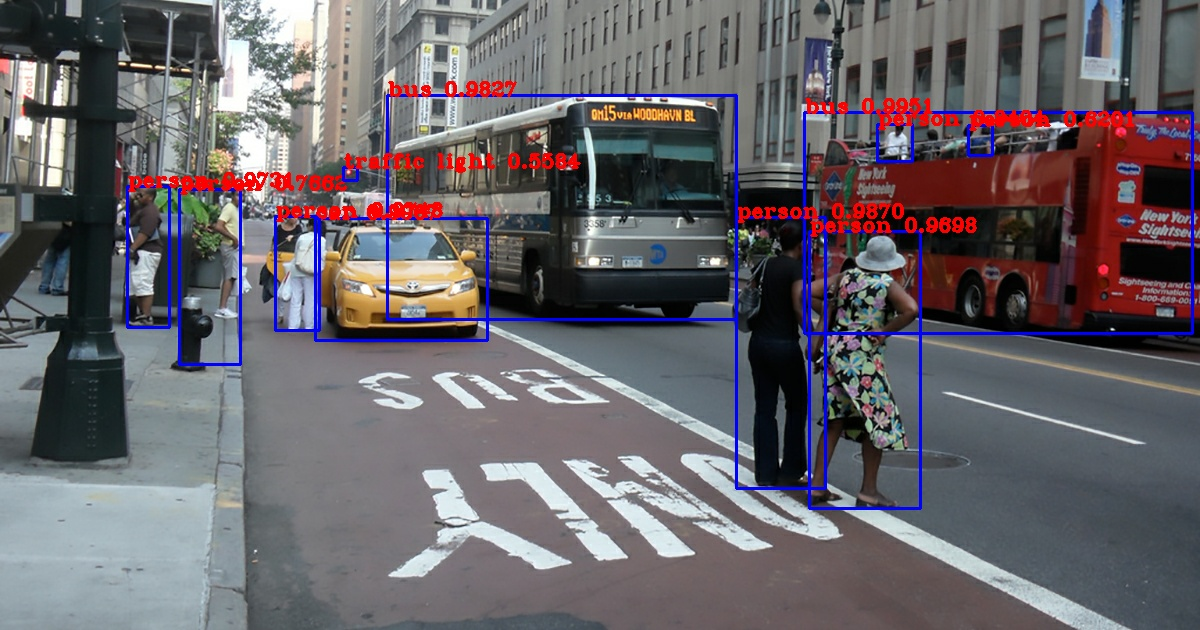

In [16]:
output = detector()
display(Image(data=bytes(cv2.imencode('.jpg', output)[1]), width=1000))